In [1]:
import os
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from tqdm import tqdm
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import operator

In [2]:
resnet50 = models.resnet50(pretrained=True)
modules=list(resnet50.children())[:-2]
resnet50=nn.Sequential(*modules)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [3]:
resnet50

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [4]:
scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

In [5]:
images_feature = {}
path = "/content/drive/MyDrive/asignement1/bottoms_resized_png"
images = os.listdir(path)
for i in tqdm(images):
    image = Image.open(os.path.join(path, i)).convert('RGB')
    tensor_image = normalize(to_tensor(scaler(image))).unsqueeze(0)
    output = resnet50(tensor_image).squeeze().view(-1, 2048 * 7* 7)
    images_feature[i] = output

100%|██████████| 120/120 [00:30<00:00,  3.87it/s]


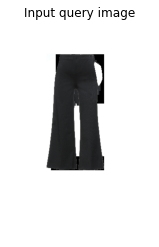

In [23]:
input_image = Image.open("/content/drive/MyDrive/asignement1/testimage/13079565VVR.png")
input_image = Image.open(os.path.join(path,i)).convert('RGB')
input_tensor = normalize(to_tensor(scaler(input_image))).unsqueeze(0)
input_feature = resnet50(input_tensor).squeeze().view(-1, 2048 * 7 * 7)
plt.title('Input query image')
plt.axis('off')
plt.imshow(np.asarray(input_image))

In [24]:
cosine = nn.CosineSimilarity(dim=1)

In [26]:
similarity_results = {}
for image_name, feature_tensor in images_feature.items():
    similarity = cosine(input_feature, feature_tensor)
    similarity_results[image_name] = similarity.item()

In [27]:
similarity_results

{'13582310EXR.png': 0.46385687589645386,
 '13582637SQD.png': 0.5350583791732788,
 '13582637SQR.png': 0.5254738330841064,
 '13582687PGD.png': 0.45860788226127625,
 '13582687PGR.png': 0.4567944407463074,
 '13582819RMD.png': 0.5145440101623535,
 '13582819RMR.png': 0.49870890378952026,
 '13582865UMD.png': 0.511437177658081,
 '13582865UMR.png': 0.534731388092041,
 '13582867PND.png': 0.5164481401443481,
 '13582867PNR.png': 0.5167795419692993,
 '13582885XED.png': 0.5553780198097229,
 '13582885XER.png': 0.5472067594528198,
 '13583355RCD.png': 0.5038747787475586,
 '13583355RCR.png': 0.510306715965271,
 '13583370LCD.png': 0.4915040135383606,
 '13583370LCR.png': 0.48532211780548096,
 '13583498OWD.png': 0.46669912338256836,
 '13583498OWR.png': 0.5036778450012207,
 '13583833LWD.png': 0.5422443747520447,
 '13583833LWR.png': 0.5324150919914246,
 '13584030TPD.png': 0.562285304069519,
 '13584030TPR.png': 0.5772092342376709,
 '13584294WPD.png': 0.5626574754714966,
 '13584294WPR.png': 0.5584396123886108,

In [28]:
sorted_results= dict(sorted(similarity_results.items(), reverse=True, key=operator.itemgetter(1)))
output = (list(sorted_results.keys())[0: 10])  

In [29]:
output

['13585467DUR.png',
 '13585468XKR.png',
 '13585441ENR.png',
 '13585467DUD.png',
 '13584030TPR.png',
 '13584378KXD.png',
 '13585245GTR.png',
 '13584688STD.png',
 '13585211SPR.png',
 '13585444SCD.png']

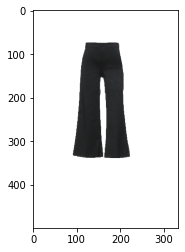

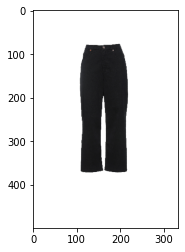

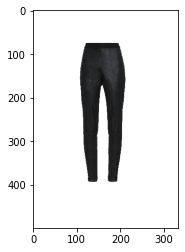

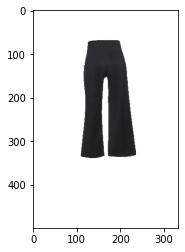

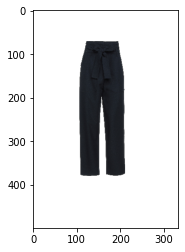

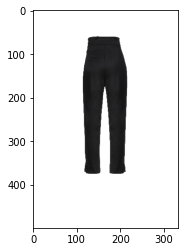

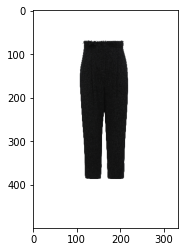

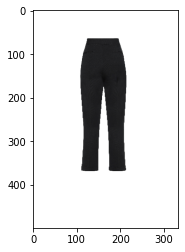

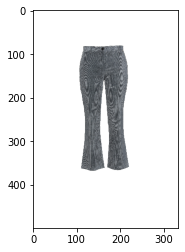

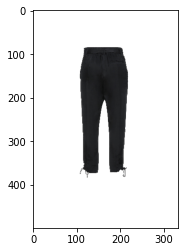

In [30]:
path = "/content/drive/MyDrive/asignement1/bottoms_resized_png"
j = 1
for i in output:
    img = plt.imread(os.path.join(path, i))
    plt.imshow(img)
    img = Image.fromarray((img*255).astype(np.uint8))
    img.save(f"Suggestions\suggestion {j}.png")
    j+=1
    plt.show()